## Predicting terrorist attack success from attack characteristics, using Neural Networks

The goal of this section is to predict whether an attack will succeed or fail, given the characteristics of the attack. The X is categorical one-hot-encoded features describing the attack, while the Y is the success or failure of the attack. Success is defined according to the definition of success in the code book. 

For this section we will use a neural network model to perform the
prediction. 

In [57]:
# Library imports. Keras used for neural network
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preprocess_functions import load_data_relevant_cols
from preprocess_functions import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import keras

In [2]:
# Loading data
raw = load_data_relevant_cols()

/Users/Paul/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,61,62,63,64,73,76,79,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/Paul/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (6,61,62,63,79,94,96,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
# Variable Examples:
print(raw.attacktype1_txt.unique()[0:10])

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [12]:
print(raw.targtype1_txt.unique()[0:10])

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution']


In [10]:
print(raw.targsubtype1_txt.unique()[0:10])

['Named Civilian' 'Diplomatic Personnel (outside of embassy, consulate)'
 'Radio Journalist/Staff/Facility' 'Embassy/Consulate'
 'Police Building (headquarters, station, school)'
 'Police Security Forces/Officers' 'Electricity'
 'Military Recruiting Station/Academy'
 'Government Building/Facility/Office'
 'Military Barracks/Base/Headquarters/Checkpost']


In [14]:
print(raw.weaptype1_txt.unique()[0:10])

['Unknown' 'Explosives/Bombs/Dynamite' 'Incendiary' 'Firearms' 'Chemical'
 'Fake Weapons' 'Melee' 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Radiological']


In [15]:
print(raw.weapsubtype1_txt.unique()[0:10])

[nan 'Unknown Explosive Type' 'Unknown Gun Type' 'Automatic Weapon'
 'Molotov Cocktail/Petrol Bomb' 'Gasoline or Alcohol'
 'Rifle/Shotgun (non-automatic)' 'Arson/Fire'
 'Projectile (rockets, mortars, RPGs, etc.)' 'Vehicle']


To use the categorical variables for analysis, we need to convert them to one-hot-encoded dummy variables, using pandas built in get_dummies function

In [59]:
# Making one-hot-encoded dummy variables
rel_columns = ['attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'weaptype1_txt', 'weapsubtype1_txt']
X = get_dummies(raw, rel_columns)
Y = raw.success

### Neural Network predictive model

In addition to a LassoCV model, we used a neural network to see if we could get a more accurate prediction. Since the data is on the scale of hundreds of thousands of rows, it is highly likely that a neural network will do better than a linear model. 

The first hyperparameter to check is the activation function. We try tanh, relu, and sigmoid activations. 

In [143]:
# Using Keras to build neural networks.
model_tanh = Sequential()
model_tanh.add(Dense(units=10, activation='tanh', input_dim=182))
model_tanh.add(Dense(units=10, activation='tanh'))
model_tanh.add(Dense(units=1, activation='sigmoid'))

model_tanh.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_tanh = model_tanh.fit(X_train.values, y_train, epochs=25, batch_size=32, validation_data=(X_test.values, y_test))

Train on 153315 samples, validate on 17035 samples
Epoch 1/25
153315/153315 [==============================] - 12s - loss: 0.2811 - binary_accuracy: 0.9052 - val_loss: 0.2766 - val_binary_accuracy: 0.9066
Epoch 2/25
153315/153315 [==============================] - 12s - loss: 0.2731 - binary_accuracy: 0.9069 - val_loss: 0.2727 - val_binary_accuracy: 0.9070
Epoch 3/25
153315/153315 [==============================] - 12s - loss: 0.2706 - binary_accuracy: 0.9078 - val_loss: 0.2708 - val_binary_accuracy: 0.9082
Epoch 4/25
153315/153315 [==============================] - 12s - loss: 0.2688 - binary_accuracy: 0.9087 - val_loss: 0.2699 - val_binary_accuracy: 0.9088
Epoch 5/25
153315/153315 [==============================] - 12s - loss: 0.2675 - binary_accuracy: 0.9089 - val_loss: 0.2691 - val_binary_accuracy: 0.9095
Epoch 6/25
153315/153315 [==============================] - 12s - loss: 0.2665 - binary_accuracy: 0.9094 - val_loss: 0.2687 - val_binary_accuracy: 0.9090
Epoch 7/25
153315/153315 

In [144]:
model_relu = Sequential()
model_relu.add(Dense(units=10, activation='relu', input_dim=182))
model_relu.add(Dense(units=10, activation='relu'))
model_relu.add(Dense(units=1, activation='sigmoid'))

model_relu.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_relu = model_relu.fit(X_train.values, y_train, epochs=25, batch_size=32, validation_data=(X_test.values, y_test))

Train on 153315 samples, validate on 17035 samples
Epoch 1/25
153315/153315 [==============================] - 12s - loss: 0.2825 - binary_accuracy: 0.9032 - val_loss: 0.2740 - val_binary_accuracy: 0.9082
Epoch 2/25
153315/153315 [==============================] - 12s - loss: 0.2700 - binary_accuracy: 0.9090 - val_loss: 0.2708 - val_binary_accuracy: 0.9091
Epoch 3/25
153315/153315 [==============================] - 12s - loss: 0.2679 - binary_accuracy: 0.9094 - val_loss: 0.2702 - val_binary_accuracy: 0.9097
Epoch 4/25
153315/153315 [==============================] - 12s - loss: 0.2666 - binary_accuracy: 0.9096 - val_loss: 0.2697 - val_binary_accuracy: 0.9098
Epoch 5/25
153315/153315 [==============================] - 12s - loss: 0.2659 - binary_accuracy: 0.9098 - val_loss: 0.2691 - val_binary_accuracy: 0.9095
Epoch 6/25
153315/153315 [==============================] - 12s - loss: 0.2652 - binary_accuracy: 0.9098 - val_loss: 0.2689 - val_binary_accuracy: 0.9094
Epoch 7/25
153315/153315 

In [145]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(units=10, activation='sigmoid', input_dim=182))
model_sigmoid.add(Dense(units=10, activation='sigmoid'))
model_sigmoid.add(Dense(units=1, activation='sigmoid'))

model_sigmoid.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_sigmoid = model_sigmoid.fit(X_train.values, y_train, epochs=25, batch_size=32, validation_data=(X_test.values, y_test))

Train on 153315 samples, validate on 17035 samples
Epoch 1/25
153315/153315 [==============================] - 12s - loss: 0.2919 - binary_accuracy: 0.9001 - val_loss: 0.2773 - val_binary_accuracy: 0.9053
Epoch 2/25
153315/153315 [==============================] - 12s - loss: 0.2752 - binary_accuracy: 0.9056 - val_loss: 0.2758 - val_binary_accuracy: 0.9063
Epoch 3/25
153315/153315 [==============================] - 12s - loss: 0.2745 - binary_accuracy: 0.9063 - val_loss: 0.2755 - val_binary_accuracy: 0.9071
Epoch 4/25
153315/153315 [==============================] - 12s - loss: 0.2740 - binary_accuracy: 0.9068 - val_loss: 0.2751 - val_binary_accuracy: 0.9071
Epoch 5/25
153315/153315 [==============================] - 12s - loss: 0.2733 - binary_accuracy: 0.9069 - val_loss: 0.2741 - val_binary_accuracy: 0.9070
Epoch 6/25
153315/153315 [==============================] - 12s - loss: 0.2726 - binary_accuracy: 0.9070 - val_loss: 0.2738 - val_binary_accuracy: 0.9069
Epoch 7/25
153315/153315 

In [53]:
def plot_loss(history, save=False, save_path=None):
    """
    Plots and optionally saves the loss of a keras history over 
    successive epochs of training. 
    """
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['loss'], label='loss')
    plt.legend(loc='upper right')
    plt.xlabel('epoch')
    plt.ylabel('binary cross-entropy loss')
    plt.title(str(history) + ' loss')
    if save:
        plt.savefig(save_path)
    plt.show()
    
def plot_accuracy(history, save=False, save_path=None):
    """
    Plots and optionally saves the binary accuracy of a keras history over
    successive epochs of training
    """
    plt.plot(history.history['val_binary_accuracy'], label='val_accuracy')
    plt.plot(history.history['binary_accuracy'], label='accuracy')
    plt.legend(loc='lower right')
    plt.xlabel('epoch')
    plt.ylabel('binary accuracy')
    plt.title(str(history) + ' accuracy')
    if save:
        plt.savefig(save_path)
    plt.show()

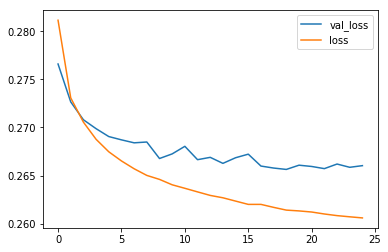

In [175]:
plot_loss(history_tanh)

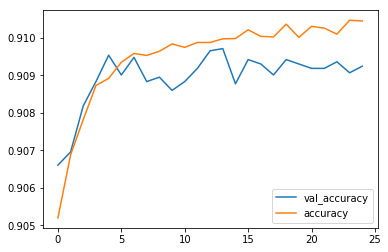

In [176]:
plot_accuracy(history_tanh)

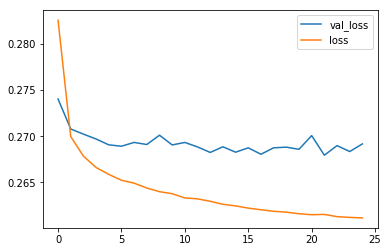

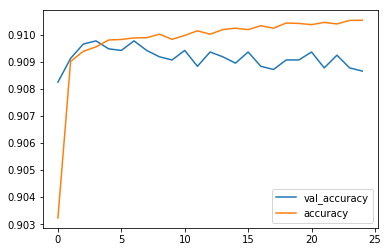

In [177]:
plot_loss(history_relu)
plot_accuracy(history_relu)

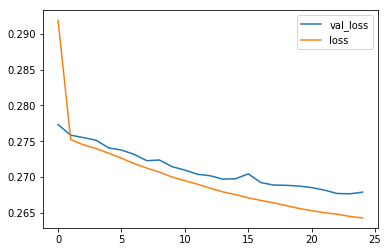

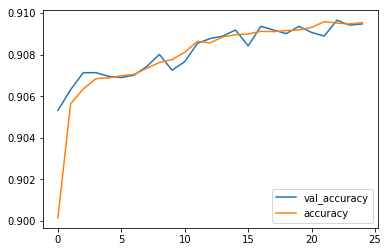

In [178]:
plot_loss(history_sigmoid)
plot_accuracy(history_sigmoid)

In [179]:
# More epochs for sigmoid training
history_sigmoid2 = model_sigmoid.fit(X_train.values, y_train, epochs=40, batch_size=32, initial_epoch=25, validation_data=(X_test.values, y_test))

Train on 153315 samples, validate on 17035 samples
Epoch 26/40
153315/153315 [==============================] - 12s - loss: 0.2640 - binary_accuracy: 0.9095 - val_loss: 0.2678 - val_binary_accuracy: 0.9095
Epoch 27/40
153315/153315 [==============================] - 12s - loss: 0.2638 - binary_accuracy: 0.9096 - val_loss: 0.2676 - val_binary_accuracy: 0.9100
Epoch 28/40
153315/153315 [==============================] - 11s - loss: 0.2636 - binary_accuracy: 0.9098 - val_loss: 0.2675 - val_binary_accuracy: 0.9097
Epoch 29/40
153315/153315 [==============================] - 11s - loss: 0.2635 - binary_accuracy: 0.9098 - val_loss: 0.2677 - val_binary_accuracy: 0.9094
Epoch 30/40
153315/153315 [==============================] - 12s - loss: 0.2634 - binary_accuracy: 0.9097 - val_loss: 0.2672 - val_binary_accuracy: 0.9095
Epoch 31/40
153315/153315 [==============================] - 13s - loss: 0.2632 - binary_accuracy: 0.9098 - val_loss: 0.2670 - val_binary_accuracy: 0.9097
Epoch 32/40
153315/

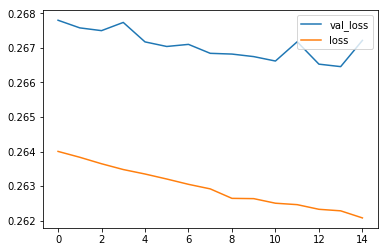

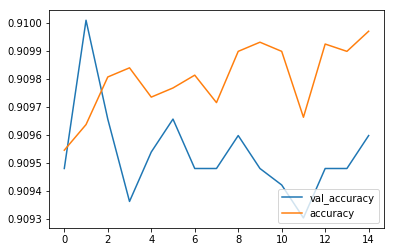

In [180]:
plot_loss(history_sigmoid2)
plot_accuracy(history_sigmoid2)

In [185]:
np.where(history_relu.history['val_binary_accuracy'] == max(history_relu.history['val_binary_accuracy']))

(array([3, 6]),)

In [186]:
np.where(history_tanh.history['val_binary_accuracy'] == max(history_tanh.history['val_binary_accuracy']))

(array([13]),)

In [187]:
max(history_relu.history['val_binary_accuracy'])

0.90977399473425435

In [188]:
max(history_tanh.history['val_binary_accuracy'])

0.90971529206328283

It appears that tanh with a few (<10) epochs are the best activation function. Now we will try a few different model architectures

In [189]:
# First, a wide model (more nodes per layer)
model_wide = Sequential()
model_wide.add(Dense(units=32, activation='tanh', input_dim=182))
model_wide.add(Dense(units=32, activation='tanh'))
model_wide.add(Dense(units=1, activation='sigmoid'))

model_wide.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_wide = model_wide.fit(X_train.values, y_train, epochs=10, batch_size=32, validation_data=(X_test.values, y_test))


Train on 153315 samples, validate on 17035 samples
Epoch 1/10
153315/153315 [==============================] - 13s - loss: 0.2792 - binary_accuracy: 0.9048 - val_loss: 0.2739 - val_binary_accuracy: 0.9070
Epoch 2/10
153315/153315 [==============================] - 13s - loss: 0.2721 - binary_accuracy: 0.9073 - val_loss: 0.2711 - val_binary_accuracy: 0.9081
Epoch 3/10
153315/153315 [==============================] - 13s - loss: 0.2692 - binary_accuracy: 0.9087 - val_loss: 0.2692 - val_binary_accuracy: 0.9091
Epoch 4/10
153315/153315 [==============================] - 13s - loss: 0.2672 - binary_accuracy: 0.9089 - val_loss: 0.2688 - val_binary_accuracy: 0.9088
Epoch 5/10
153315/153315 [==============================] - 12s - loss: 0.2661 - binary_accuracy: 0.9093 - val_loss: 0.2684 - val_binary_accuracy: 0.9092
Epoch 6/10
153315/153315 [==============================] - 12s - loss: 0.2652 - binary_accuracy: 0.9093 - val_loss: 0.2682 - val_binary_accuracy: 0.9095
Epoch 7/10
153315/153315 

In [190]:
# Next, a wider model with even more nodes per layer
model_wider = Sequential()
model_wider.add(Dense(units=64, activation='tanh', input_dim=182))
model_wider.add(Dense(units=64, activation='tanh'))
model_wider.add(Dense(units=1, activation='sigmoid'))

model_wider.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_wide = model_wider.fit(X_train.values, y_train, epochs=10, batch_size=32, validation_data=(X_test.values, y_test))


Train on 153315 samples, validate on 17035 samples
Epoch 1/10
153315/153315 [==============================] - 14s - loss: 0.2786 - binary_accuracy: 0.9048 - val_loss: 0.2738 - val_binary_accuracy: 0.9050
Epoch 2/10
153315/153315 [==============================] - 13s - loss: 0.2718 - binary_accuracy: 0.9079 - val_loss: 0.2717 - val_binary_accuracy: 0.9084
Epoch 3/10
153315/153315 [==============================] - 13s - loss: 0.2689 - binary_accuracy: 0.9088 - val_loss: 0.2702 - val_binary_accuracy: 0.9085
Epoch 4/10
153315/153315 [==============================] - 13s - loss: 0.2670 - binary_accuracy: 0.9091 - val_loss: 0.2690 - val_binary_accuracy: 0.9089
Epoch 5/10
153315/153315 [==============================] - 13s - loss: 0.2655 - binary_accuracy: 0.9095 - val_loss: 0.2682 - val_binary_accuracy: 0.9094
Epoch 6/10
153315/153315 [==============================] - 13s - loss: 0.2647 - binary_accuracy: 0.9095 - val_loss: 0.2675 - val_binary_accuracy: 0.9088
Epoch 7/10
153315/153315 

In [192]:
# Next, a deep model, with more layers
model_deep = Sequential()
model_deep.add(Dense(units=10, activation='tanh', input_dim=182))
model_deep.add(Dense(units=10, activation='tanh'))
model_deep.add(Dense(units=10, activation='tanh'))
model_deep.add(Dense(units=1, activation='sigmoid'))

model_deep.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_deep = model_deep.fit(X_train.values, y_train, epochs=15, batch_size=32, validation_data=(X_test.values, y_test))


Train on 153315 samples, validate on 17035 samples
Epoch 1/15
153315/153315 [==============================] - 15s - loss: 0.2811 - binary_accuracy: 0.9051 - val_loss: 0.2739 - val_binary_accuracy: 0.9075
Epoch 2/15
153315/153315 [==============================] - 14s - loss: 0.2721 - binary_accuracy: 0.9075 - val_loss: 0.2730 - val_binary_accuracy: 0.9080
Epoch 3/15
153315/153315 [==============================] - 14s - loss: 0.2702 - binary_accuracy: 0.9086 - val_loss: 0.2704 - val_binary_accuracy: 0.9092
Epoch 4/15
153315/153315 [==============================] - 15s - loss: 0.2687 - binary_accuracy: 0.9090 - val_loss: 0.2701 - val_binary_accuracy: 0.9092
Epoch 5/15
153315/153315 [==============================] - 13s - loss: 0.2677 - binary_accuracy: 0.9091 - val_loss: 0.2700 - val_binary_accuracy: 0.9091
Epoch 6/15
153315/153315 [==============================] - 12s - loss: 0.2670 - binary_accuracy: 0.9092 - val_loss: 0.2691 - val_binary_accuracy: 0.9094
Epoch 7/15
153315/153315 

In [193]:
# Next, a bigger model, with both more layers and more nodes per layer
model_big = Sequential()
model_big.add(Dense(units=32, activation='tanh', input_dim=182))
model_big.add(Dense(units=32, activation='tanh'))
model_big.add(Dense(units=32, activation='tanh'))
model_big.add(Dense(units=1, activation='sigmoid'))

model_big.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_big = model_deep.fit(X_train.values, y_train, epochs=20, batch_size=32, validation_data=(X_test.values, y_test))


Train on 153315 samples, validate on 17035 samples
Epoch 1/20
153315/153315 [==============================] - 13s - loss: 0.2627 - binary_accuracy: 0.9099 - val_loss: 0.2680 - val_binary_accuracy: 0.9101
Epoch 2/20
153315/153315 [==============================] - 13s - loss: 0.2624 - binary_accuracy: 0.9101 - val_loss: 0.2674 - val_binary_accuracy: 0.9094
Epoch 3/20
153315/153315 [==============================] - 13s - loss: 0.2621 - binary_accuracy: 0.9101 - val_loss: 0.2674 - val_binary_accuracy: 0.9094
Epoch 4/20
153315/153315 [==============================] - 14s - loss: 0.2621 - binary_accuracy: 0.9102 - val_loss: 0.2675 - val_binary_accuracy: 0.9092
Epoch 5/20
153315/153315 [==============================] - 15s - loss: 0.2619 - binary_accuracy: 0.9101 - val_loss: 0.2670 - val_binary_accuracy: 0.9092
Epoch 6/20
153315/153315 [==============================] - 15s - loss: 0.2616 - binary_accuracy: 0.9099 - val_loss: 0.2679 - val_binary_accuracy: 0.9092
Epoch 7/20
153315/153315 

Since L1 regularizers worked well with linear models, trying to use L2 and L1 regularization on the inputs. 

In [195]:
from keras import regularizers

model_deep_l2 = Sequential()
model_deep_l2.add(Dense(units=10, activation='tanh', input_dim=182, kernel_regularizer=regularizers.l2(0.01)))
model_deep_l2.add(Dense(units=10, activation='tanh'))
model_deep_l2.add(Dense(units=10, activation='tanh'))
model_deep_l2.add(Dense(units=1, activation='sigmoid'))

model_deep_l2.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_deep_l2 = model_deep_l2.fit(X_train.values, y_train, epochs=15, batch_size=32, validation_data=(X_test.values, y_test))


Train on 153315 samples, validate on 17035 samples
Epoch 1/15
153315/153315 [==============================] - 15s - loss: 0.2946 - binary_accuracy: 0.9045 - val_loss: 0.2911 - val_binary_accuracy: 0.9063
Epoch 2/15
153315/153315 [==============================] - 15s - loss: 0.2832 - binary_accuracy: 0.9056 - val_loss: 0.2825 - val_binary_accuracy: 0.9031
Epoch 3/15
153315/153315 [==============================] - 15s - loss: 0.2813 - binary_accuracy: 0.9059 - val_loss: 0.2824 - val_binary_accuracy: 0.9067
Epoch 4/15
153315/153315 [==============================] - 15s - loss: 0.2802 - binary_accuracy: 0.9063 - val_loss: 0.2829 - val_binary_accuracy: 0.9035
Epoch 5/15
153315/153315 [==============================] - 15s - loss: 0.2798 - binary_accuracy: 0.9067 - val_loss: 0.2788 - val_binary_accuracy: 0.9074
Epoch 6/15
153315/153315 [==============================] - 15s - loss: 0.2794 - binary_accuracy: 0.9072 - val_loss: 0.2819 - val_binary_accuracy: 0.9070
Epoch 7/15
153315/153315 

In [196]:
# Looks like deep tanh models with a few epochs have steady losses! Now lets try some different architectures
from keras import regularizers
model_deep_l1 = Sequential()
model_deep_l1.add(Dense(units=10, activation='tanh', input_dim=182, kernel_regularizer=regularizers.l1(0.01)))
model_deep_l1.add(Dense(units=10, activation='tanh'))
model_deep_l1.add(Dense(units=10, activation='tanh'))
model_deep_l1.add(Dense(units=1, activation='sigmoid'))

model_deep_l1.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_deep_l1 = model_deep_l1.fit(X_train.values, y_train, epochs=15, batch_size=32, validation_data=(X_test.values, y_test))


Train on 153315 samples, validate on 17035 samples
Epoch 1/15
153315/153315 [==============================] - 15s - loss: 0.3349 - binary_accuracy: 0.9030 - val_loss: 0.3025 - val_binary_accuracy: 0.9024
Epoch 2/15
153315/153315 [==============================] - 14s - loss: 0.2994 - binary_accuracy: 0.9054 - val_loss: 0.2953 - val_binary_accuracy: 0.9038
Epoch 3/15
153315/153315 [==============================] - 14s - loss: 0.2969 - binary_accuracy: 0.9052 - val_loss: 0.2981 - val_binary_accuracy: 0.9011
Epoch 4/15
153315/153315 [==============================] - 14s - loss: 0.2966 - binary_accuracy: 0.9050 - val_loss: 0.2950 - val_binary_accuracy: 0.9065
Epoch 5/15
153315/153315 [==============================] - 14s - loss: 0.2966 - binary_accuracy: 0.9056 - val_loss: 0.2980 - val_binary_accuracy: 0.9016
Epoch 6/15
153315/153315 [==============================] - 14s - loss: 0.2965 - binary_accuracy: 0.9054 - val_loss: 0.2972 - val_binary_accuracy: 0.9036
Epoch 7/15
153315/153315 

Regularization does not help, according binary cross validation
on a test set. Big (deep and wide) models seem the best. 

In [34]:
# Rerunning final model 
model_final = Sequential()
model_final.add(Dense(units=32, activation='tanh', input_dim=182))
model_final.add(Dense(units=32, activation='tanh'))
model_final.add(Dense(units=32, activation='tanh'))
model_final.add(Dense(units=1, activation='sigmoid'))

model_final.compile(loss=keras.losses.binary_crossentropy, metrics=['binary_accuracy'],
              optimizer='adam')

history_big = model_final.fit(X_train.values, y_train, epochs=10, batch_size=32, validation_data=(X_test.values, y_test))


Train on 153315 samples, validate on 17035 samples
Epoch 1/10
153315/153315 [==============================] - 14s - loss: 0.2777 - binary_accuracy: 0.9056 - val_loss: 0.2754 - val_binary_accuracy: 0.9053
Epoch 2/10
153315/153315 [==============================] - 13s - loss: 0.2703 - binary_accuracy: 0.9085 - val_loss: 0.2702 - val_binary_accuracy: 0.9086
Epoch 3/10
153315/153315 [==============================] - 14s - loss: 0.2678 - binary_accuracy: 0.9090 - val_loss: 0.2721 - val_binary_accuracy: 0.9086
Epoch 4/10
153315/153315 [==============================] - 13s - loss: 0.2665 - binary_accuracy: 0.9093 - val_loss: 0.2684 - val_binary_accuracy: 0.9092
Epoch 5/10
153315/153315 [==============================] - 14s - loss: 0.2655 - binary_accuracy: 0.9098 - val_loss: 0.2677 - val_binary_accuracy: 0.9091
Epoch 6/10
153315/153315 [==============================] - 13s - loss: 0.2646 - binary_accuracy: 0.9097 - val_loss: 0.2676 - val_binary_accuracy: 0.9092
Epoch 7/10
153315/153315 

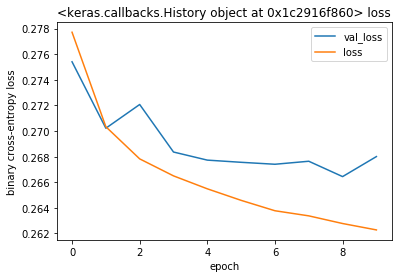

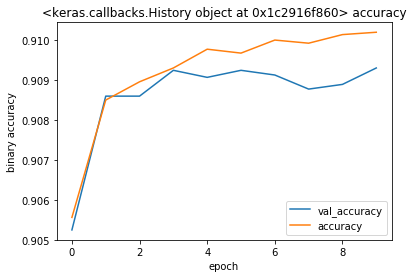

In [54]:
# Loss and accuracy for final model
plot_loss(history_big, save=True, save_path='figures/NN_loss')
plot_accuracy(history_big, save=True, save_path='figures/NN_accuracy')

In [55]:
# ROC Curve analysis
y_pred = model_final.predict(X_test.values)
fpr, tpr, thresh = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

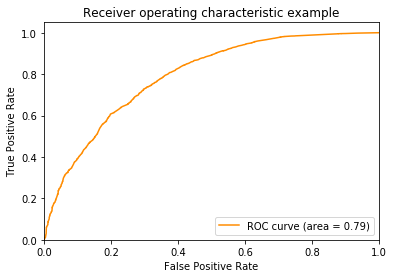

In [56]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('figures/NN_ROC')
plt.show()

In [42]:
# Choosing the rounding threshold where the true positive rate
# is greater than 0.9
loc = np.min(np.where(tpr > 0.9))
fpr[loc]
threshold = thresh[loc]
# Rounding the predictions based on the threshold
rounded = []
for i in y_pred:
    if i > threshold:
        rounded.append(1)
    else:
        rounded.append(0)
rounded_y_pred = np.array(rounded)

In [43]:
confusion_matrix(y_test, rounded_y_pred)

array([[  861,   899],
       [ 1535, 13740]])

- True Negatives: 861
- False Negatives: 1535
- True Positives: 13740
- False Positives: 899

In [44]:
# Calculating binary accuracy
accuracy = (13740 + 861) / (13740 + 861 + 1535 + 899)
accuracy

0.8571176988552979